# Лабораторная работа №5
## Выполнил студент группы Курмашев Данил БПИ2303

### Оглавление
1. [Задание 1](#Задание-№1)
2. [Задание 2](#Задание-№2)

> Дополнительные модули, использованные при выполнение лабораторной

In [3]:
import time
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import deque

### Задание №1
Реализовать методы поиска подстроки в строке. Добавить возможность ввода строки и подстроки с клавиатуры. Предусмотреть возможность существования пробела. Реализовать возможность выбора опции чувствительности или нечувствительности к регистру. Оценить время работы каждого алгоритма поиска и сравнить его со временем работы стандартной функции поиска, используемой в выбранном языке программирования.

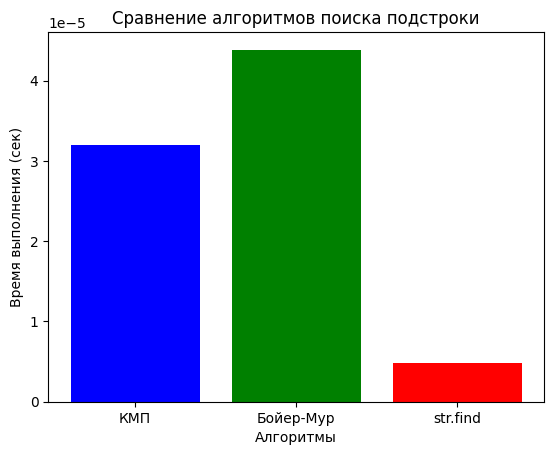

In [ ]:
def get_input():
    text = input("Введите строку: ")
    pattern = input("Введите подстроку: ")
    case_sensitive = input("Учитывать регистр? (y/n): ").strip().lower() == 'y'
    if not case_sensitive:
        text = text.lower()
        pattern = pattern.lower()
    return text, pattern


def kmp_search(text, pattern):
    """Алгоритм Кнута-Морриса-Пратта"""
    def compute_lps(pattern):
        lps = [0] * len(pattern)
        length = 0
        i = 1
        while i < len(pattern):
            if pattern[i] == pattern[length]:
                length += 1
                lps[i] = length
                i += 1
            else:
                if length != 0:
                    length = lps[length - 1]
                else:
                    lps[i] = 0
                    i += 1
        return lps
    
    lps = compute_lps(pattern)
    i = j = 0
    matches = []
    while i < len(text):
        if pattern[j] == text[i]:
            i += 1
            j += 1
        if j == len(pattern):
            matches.append(i - j)
            j = lps[j - 1]
        elif i < len(text) and pattern[j] != text[i]:
            if j != 0:
                j = lps[j - 1]
            else:
                i += 1
    return matches


def boyer_moore_search(text, pattern):
    """Упрощенный алгоритм Бойера-Мура"""
    def bad_character_table(pattern):
        bad_char = defaultdict(lambda: -1)
        for i in range(len(pattern)):
            bad_char[pattern[i]] = i
        return bad_char
    
    bad_char = bad_character_table(pattern)
    m, n = len(pattern), len(text)
    i = 0
    matches = []
    while i <= n - m:
        j = m - 1
        while j >= 0 and pattern[j] == text[i + j]:
            j -= 1
        if j < 0:
            matches.append(i)
            i += (m - bad_char[text[i + m]] if i + m < n else 1)
        else:
            i += max(1, j - bad_char[text[i + j]])
    return matches


def measure_time(algorithm, text, pattern):
    start = time.time()
    algorithm(text, pattern)
    return time.time() - start


def compare_algorithms(text, pattern):
    kmp_time = measure_time(kmp_search, text, pattern)
    bm_time = measure_time(boyer_moore_search, text, pattern)
    builtin_time = measure_time(lambda t, p: [t.find(p)], text, pattern)
    
    labels = ["КМП", "Бойер-Мур", "str.find"]
    times = [kmp_time, bm_time, builtin_time]
    
    plt.bar(labels, times, color=['blue', 'green', 'red'])
    plt.xlabel("Алгоритмы")
    plt.ylabel("Время выполнения (сек)")
    plt.title("Сравнение алгоритмов поиска подстроки")
    plt.show()


if __name__ == "__main__":
    text, pattern = get_input()
    compare_algorithms(text, pattern)


### Задание №2
Написать программу, определяющую, является ли данное
расположение «решаемым», то есть можно ли из него за конечное число
шагов перейти к правильному. Если это возможно, то необходимо найти хотя
бы одно решение - последовательность движений, после которой числа будут
расположены в правильном порядке.
#### Входные данные: массив чисел, представляющий собой расстановку в
Порядке «слева направо, сверху вниз». Число 0 обозначает пустое поле.
Например, массив [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0] представляет
собой «решенную» позицию элементов.
#### Выходные данные: если решения нет, то функция должна вернуть
Пустой массив []. Если решение есть, то необходимо представить решение —
для каждого шага записывается номер передвигаемого на данном шаге
элемента. 

In [4]:
def is_solvable(puzzle):
    inv_count = 0
    puzzle = [num for num in puzzle if num != 0]
    for i in range(len(puzzle)):
        for j in range(i + 1, len(puzzle)):
            if puzzle[i] > puzzle[j]:
                inv_count += 1
    return inv_count % 2 == 0

def get_neighbors(state):
    moves = []
    zero_index = state.index(0)
    row, col = divmod(zero_index, 4)
    directions = {(-1, 0): "up", (1, 0): "down", (0, -1): "left", (0, 1): "right"}
    
    for (dr, dc), move in directions.items():
        new_row, new_col = row + dr, col + dc
        if 0 <= new_row < 4 and 0 <= new_col < 4:
            new_index = new_row * 4 + new_col
            new_state = state[:]
            new_state[zero_index], new_state[new_index] = new_state[new_index], new_state[zero_index]
            moves.append((new_state, state[new_index]))
    
    return moves

def solve_puzzle(start_state):
    goal_state = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0]
    if start_state == goal_state:
        return []
    
    if not is_solvable(start_state):
        return []
    
    queue = deque([(start_state, [])])
    visited = set()
    visited.add(tuple(start_state))
    
    while queue:
        current_state, path = queue.popleft()
        for neighbor, moved_tile in get_neighbors(current_state):
            if tuple(neighbor) not in visited:
                if neighbor == goal_state:
                    return path + [moved_tile]
                queue.append((neighbor, path + [moved_tile]))
                visited.add(tuple(neighbor))
    
    return []


puzzle = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0, 15]
print(solve_puzzle(puzzle))


[15]
